# Week 3 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as si

## European Options (Non-Dividend Paying Options)

### Function Documentation: `euro_option_bs`

#### Description

The `euro_option_bs` function calculates the price of a European option using the Black-Scholes model.

#### Parameters

- `S` (\\(S\\)): The spot price of the underlying asset.
- `K` (\\(K\\)): The strike price of the option.
- `T` (\\(T\\)): The time to maturity (in years) of the option.
- `r` (\\(r\\)): The risk-free interest rate (annualized).
- `vol` (\\( \sigma \\)): The volatility of the underlying asset (annualized).
- `payoff` (string): Specifies the type of option to be priced - must be either "call" or "put".

#### Implementation

The Black-Scholes formulae to calculate the option price are given as:

For a call option:

\\[ C(S, t) = S N(d_1) - K e^{-rT} N(d_2) \\]

For a put option:

\\[ P(S, t) = K e^{-rT} N(-d_2) - S N(-d_1) \\]

Where:
\\[ d_1 = \frac{{\ln(S/K) + (r + \sigma^2 / 2) T}}{{\sigma \sqrt{T}}} \\]
\\[ d_2 = \frac{{\ln(S/K) + (r - \sigma^2 / 2) T}}{{\sigma \sqrt{T}}} \\]
\\[ N(\cdot) \\] represents the cumulative distribution function of the standard normal distribution.

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
# Calculate the option price
option_price = euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

# Print the result
print(f"The European call option price is: ${option_price:.2f}")

The European call option price is: $12.34


### Code Documentation: European Call Option Pricing and Visualization

#### Description

The following code snippet calculates and visualizes the pricing of a European call option across a range of underlying asset prices, utilizing the Black-Scholes model. Additionally, it compares the calculated option prices with the payoff at maturity.


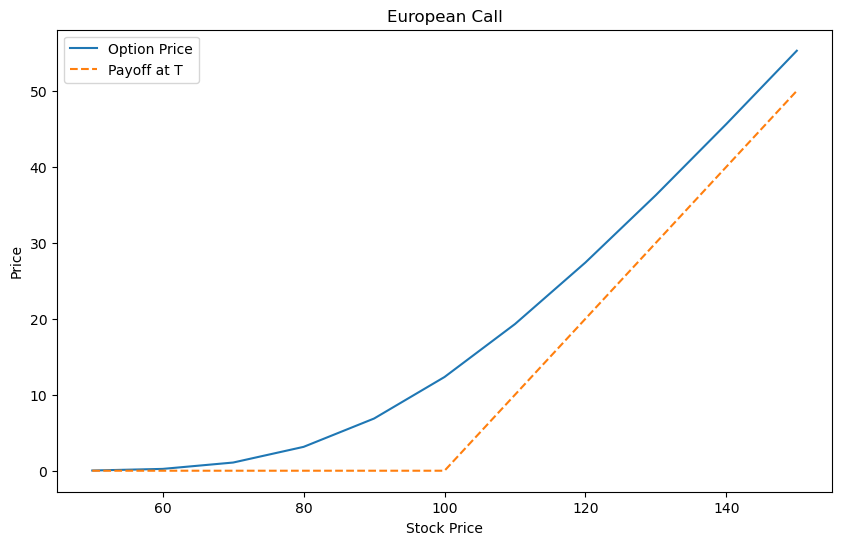

In [4]:
S = np.linspace(50, 150, 11)
cp = np.zeros((len(S), 1))

for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

fig = plt.figure(figsize=(10, 6))
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100, 0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price', 'Payoff at T'])

### Function Documentation: `euro_option_bsm`

#### Description

The `euro_option_bsm` function calculates the price of a European option using the Black-Scholes-Merton (BSM) model, which extends the Black-Scholes model to account for dividends.

#### Parameters

- `S` (\\(S\\)): Spot price of the underlying asset.
- `K` (\\(K\\)): Strike price of the option.
- `T` (\\(T\\)): Time to maturity of the option (in years).
- `r` (\\(r\\)): Risk-free interest rate (annualized).
- `q` (\\(q\\)): Continuous dividend yield.
- `vol` (\\(\sigma\\)): Volatility of the underlying asset (annualized).
- `payoff` (string): Type of option to be priced - "call" or "put".

#### Implementation

The Black-Scholes-Merton formulae for option pricing are:

For a call option:

\\[ C(S, t) = S e^{-qT} N(d_1) - K e^{-rT} N(d_2) \\]

For a put option:

\\[ P(S, t) = K e^{-rT} N(-d_2) - S e^{-qT} N(-d_1) \\]

Where:
\\[ d_1 = \frac{{\ln(S/K) + (r - q + \sigma^2 / 2) T}}{{\sigma \sqrt{T}}} \\]
\\[ d_2 = \frac{{\ln(S/K) + (r - q - \sigma^2 / 2) T}}{{\sigma \sqrt{T}}} \\]
\\[ N(\cdot) \\] represents the cumulative distribution function of the standard normal distribution.

In [5]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [6]:
# Calculate the option price using the BSM model
option_price_bsm = euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

# Print the result
print(f"The European call option price (with dividends) is: ${option_price_bsm:.2f}")

The European call option price (with dividends) is: $10.55


### Code Documentation: European Call Option Pricing over Time to Maturity

#### Description

The following code snippet calculates and visualizes the pricing of a European call option across various times to maturity, using the Black-Scholes-Merton (BSM) model. The BSM model is utilized to account for dividends while computing the option price.

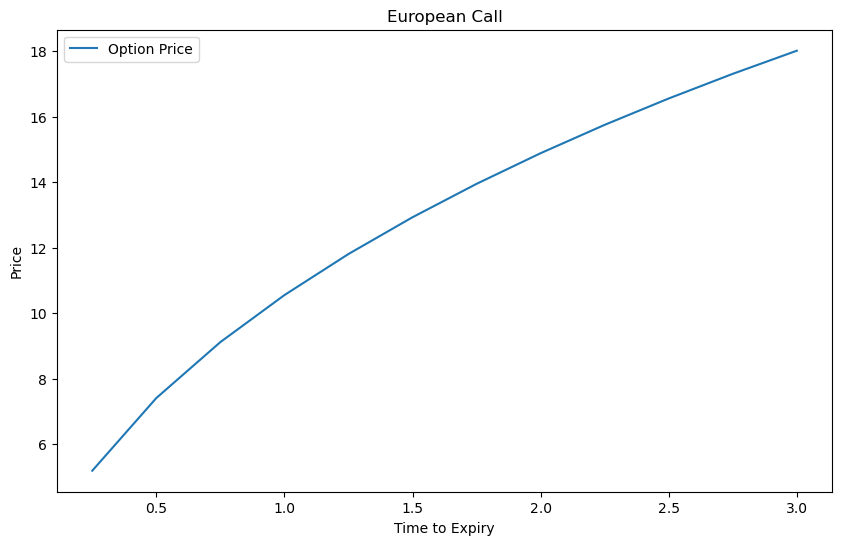

In [7]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))

for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

fig = plt.figure(figsize=(10, 6))
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])